# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - Problem Analysis Workshop 2

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


# **TODO**
- Verify the outcomes
- Write summary

## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file = "recruitment_dataset.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 4000


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [7]:
df = df_unfiltered.dropna(axis=0, how='any')
print("Total number of datapoints(rows)", len(df))

df.describe()

Total number of datapoints(rows) 4000


,age,ind-university_grade,ind-languages
count,4000.000000,4000.000000,4000.000000
mean,26.179000,62.380000,1.336250
std,2.807477,5.916194,0.854031
min,21.000000,45.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,78.000000,3.000000


We removed rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

### **Aim of the analysis**


###### **TODO Write what we are doin**

##### **QQ Normal Plot**

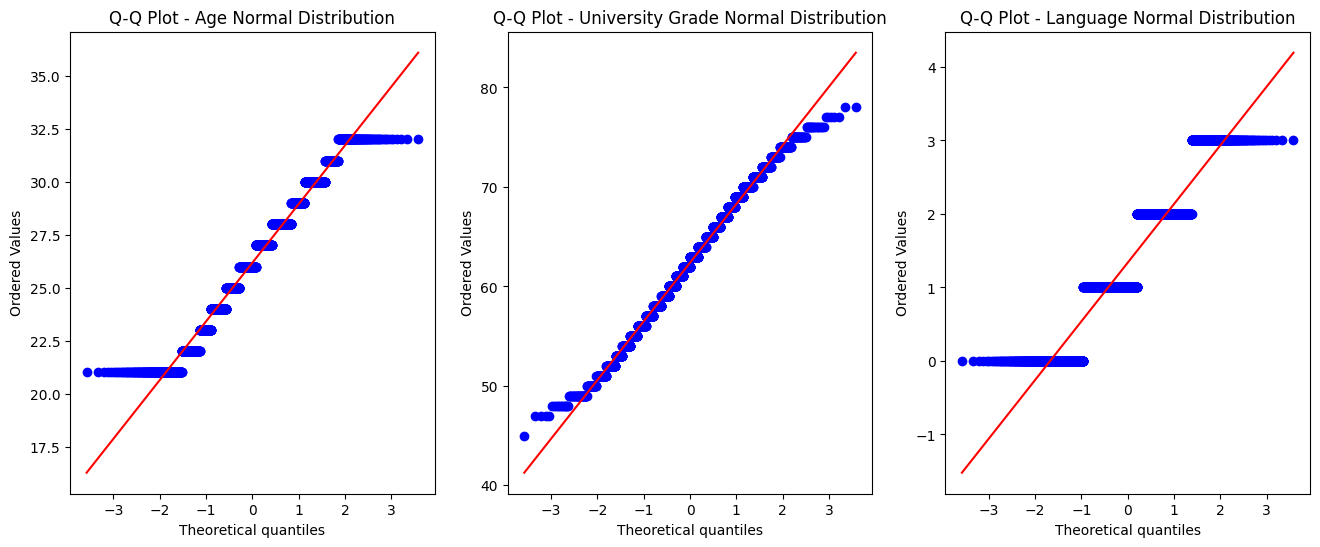

In [8]:
# Create Q-Q plot using scipy's probplot
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(16, 6))
stats.probplot(df['age'], dist="norm", plot=ax[0])
stats.probplot(df['ind-university_grade'], dist="norm", plot=ax[1])
stats.probplot(df['ind-languages'], dist="norm", plot=ax[2])


# Show the plot
ax[0].set_title('Q-Q Plot - Age Normal Distribution')
ax[1].set_title('Q-Q Plot - University Grade Normal Distribution')
ax[2].set_title('Q-Q Plot - Language Normal Distribution')

plt.show()

#### **Histogram plot**

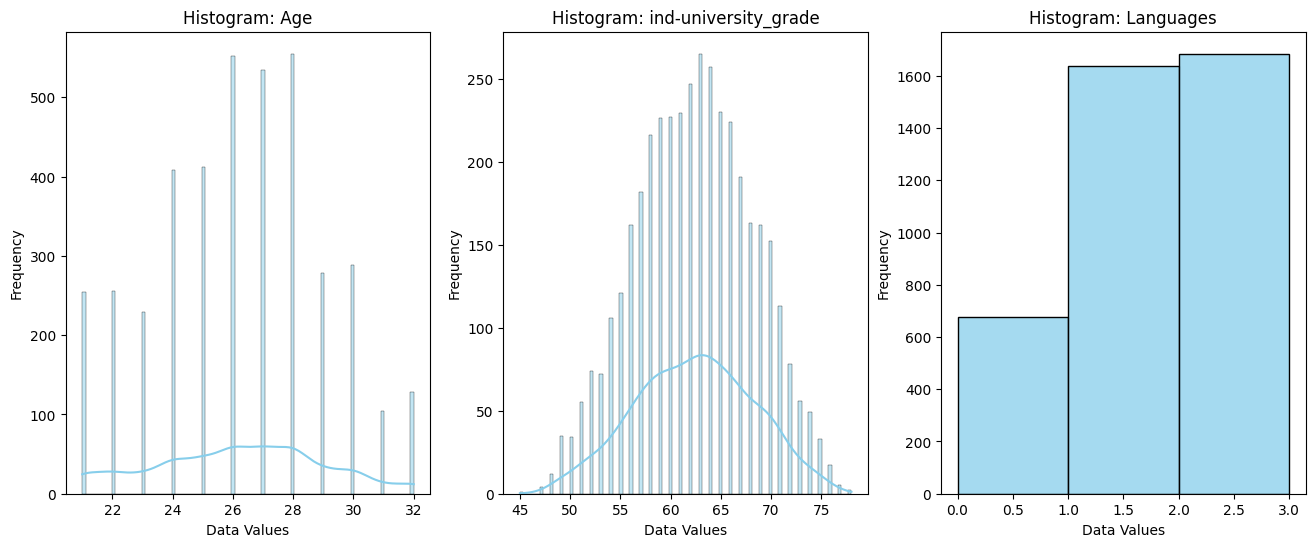

In [9]:
fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 6))

sns.histplot(df['age'], bins=100, kde=True, color='skyblue', ax=ax[0])
# Add labels and title
ax[0].set_xlabel('Data Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram: Age')
sns.histplot(df['ind-university_grade'], bins=100, kde=True, color='skyblue', ax=ax[1])
ax[1].set_xlabel('Data Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram: ind-university_grade')
sns.histplot(df['ind-languages'], bins=3, kde=False, color='skyblue', ax=ax[2])
ax[2].set_xlabel('Data Values')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Histogram: Languages')

# Show plot
plt.show()


##### **Box Plot**

> From the QQ plot and Histogram we understand that the distributions for university grade and age can be further checked and analysed. The distinct values we have for languages itself is too small ( ie 1,2,3) to be plotted as a normal distribution.

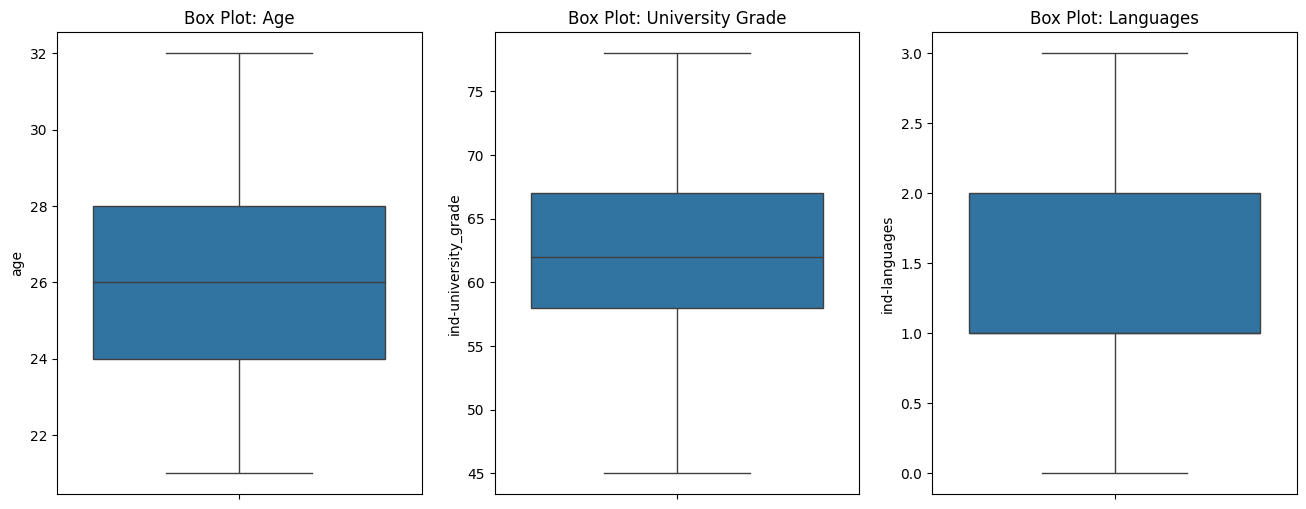

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 6))

sns.boxplot(y=df['age'], ax=ax[0])
ax[0].set_title('Box Plot: Age')

sns.boxplot(y=df['ind-university_grade'], ax=ax[1])
ax[1].set_title('Box Plot: University Grade')

sns.boxplot(y=df['ind-languages'], ax=ax[2])
ax[2].set_title('Box Plot: Languages')

plt.show()

#### **Z-Score**

In [14]:
# The z score for age
z_scores = stats.zscore(df['age'])
abs_z_scores = abs(z_scores)

# The z score for ind-university_grade
z_scores_university_grade = stats.zscore(df['ind-university_grade'])
abs_z_scores_university_grade = abs(z_scores_university_grade)

# The z score for ind-languages
z_scores_languages = stats.zscore(df['ind-languages'])
abs_z_scores_languages = abs(z_scores_languages)

# analyse the z scores and print them
print("Z Scores for Age")
print(z_scores)
print(abs_z_scores)

print("Z Scores for University Grade")  
print(z_scores_university_grade)
print(abs_z_scores_university_grade)

print("Z Scores for Languages")
print(z_scores_languages)
print(abs_z_scores_languages)



Z Scores for Age
0      -0.776239
1      -0.063766
2      -1.132475
3      -0.776239
4      -0.063766
          ...   
3995    0.648706
3996    0.292470
3997   -0.776239
3998   -1.488711
3999    0.648706
Name: age, Length: 4000, dtype: float64
0       0.776239
1       0.063766
2       1.132475
3       0.776239
4       0.063766
          ...   
3995    0.648706
3996    0.292470
3997    0.776239
3998    1.488711
3999    0.648706
Name: age, Length: 4000, dtype: float64
Z Scores for University Grade
0       1.288151
1       0.781005
2       0.781005
3       1.288151
4      -0.571385
          ...   
3995    0.104810
3996   -0.064239
3997   -0.402336
3998    0.611956
3999   -0.740433
Name: ind-university_grade, Length: 4000, dtype: float64
0       1.288151
1       0.781005
2       0.781005
3       1.288151
4       0.571385
          ...   
3995    0.104810
3996    0.064239
3997    0.402336
3998    0.611956
3999    0.740433
Name: ind-university_grade, Length: 4000, dtype: float64
Z Scores fo


#### Summary
The Z-scores for age, university grade, and languages have been calculated.
The Z-scores indicate how many standard deviations an element is from the mean.
- For age, the Z-scores range from -1.49 to 0.65, suggesting most values are close to the mean.
- University grade Z-scores range from -0.74 to 1.29, indicating a wider spread. 
- Languages Z-scores range from -1.56 to 0.77, showing some outliers.

Overall, the Z-scores help identify outliers and understand the distribution of the data.

#### **T-Score**

In [15]:
# Calculate T-scores for age
t_scores = (df['age'] - df['age'].mean()) / df['age'].std() * 10 + 50

# Calculate T-scores for ind-university_grade
t_scores_university_grade = (df['ind-university_grade'] - df['ind-university_grade'].mean()) / df['ind-university_grade'].std() * 10 + 50

# Calculate T-scores for ind-languages
t_scores_languages = (df['ind-languages'] - df['ind-languages'].mean()) / df['ind-languages'].std() * 10 + 50

# Print the T-scores
print("T Scores for Age")
print(t_scores)

print("T Scores for University Grade")
print(t_scores_university_grade)

print("T Scores for Languages")
print(t_scores_languages)

# Summary
print("\nSummary:")
print("The T-scores for age, university grade, and languages have been calculated.")
print("The T-scores indicate how many standard deviations an element is from the mean, scaled to a mean of 50 and a standard deviation of 10.")
print("- For age, the T-scores range from", t_scores.min(), "to", t_scores.max(), ", suggesting most values are close to the mean.")
print("- University grade T-scores range from", t_scores_university_grade.min(), "to", t_scores_university_grade.max(), ", indicating a wider spread.")
print("- Languages T-scores range from", t_scores_languages.min(), "to", t_scores_languages.max(), ", showing some outliers.")

T Scores for Age
0       42.238584
1       49.362417
2       38.676668
3       42.238584
4       49.362417
          ...    
3995    56.486250
3996    52.924333
3997    42.238584
3998    35.114751
3999    56.486250
Name: age, Length: 4000, dtype: float64
T Scores for University Grade
0       62.879902
1       57.809075
2       57.809075
3       62.879902
4       44.286867
          ...    
3995    51.047971
3996    49.357695
3997    45.977143
3998    56.118799
3999    42.596592
Name: ind-university_grade, Length: 4000, dtype: float64
T Scores for Languages
0       46.062787
1       57.771970
2       34.353605
3       46.062787
4       46.062787
          ...    
3995    34.353605
3996    57.771970
3997    57.771970
3998    46.062787
3999    46.062787
Name: ind-languages, Length: 4000, dtype: float64

Summary:
The T-scores for age, university grade, and languages have been calculated.
The T-scores indicate how many standard deviations an element is from the mean, scaled to a mean of 50 

#### Summary
The T-scores indicate how many standard deviations an element is from the mean, scaled to a mean of 50 and a standard deviation of 10.
- For age, the T-scores range from 31.552834736950004 to 70.7339156200452 , suggesting most values are close to the mean.
- University grade T-scores range from 20.62300479818145 to 76.40210961176096 , indicating a wider spread.
- Languages T-scores range from 34.35360527681285 to 69.481151895755 , showing some outliers.

#### **Shapiro-Wilk Normality Test**

In [10]:
def check_shapiro_wilk_normality(data, title):
    statistic, p_value = stats.shapiro(data)
    # Output the results
    print('Shapiro-Wilk Test Statistic:', statistic)    
    print('p-value:', p_value)
    # Interpretation
    alpha = 0.05
    print(title)
    if p_value < alpha:
        print("Reject the null hypothesis: the data does not follow a normal distribution.\n\n")
    else:
        print("Fail to reject the null hypothesis: the data follows a normal distribution.\n\n")

check_shapiro_wilk_normality(df['age'], "Check if distribution of age is normal")
check_shapiro_wilk_normality(df['ind-university_grade'], 'Check if distribution of grade is normal')


print(stats.shapiro(df['age']))
print(stats.shapiro(df['ind-university_grade']))

Shapiro-Wilk Test Statistic: 0.9718903969318086
p-value: 2.4105838550570843e-27
Check if distribution of age is normal
Reject the null hypothesis: the data does not follow a normal distribution.


Shapiro-Wilk Test Statistic: 0.9931196475557424
p-value: 6.142056805066423e-13
Check if distribution of grade is normal
Reject the null hypothesis: the data does not follow a normal distribution.


ShapiroResult(statistic=0.9718903969318086, pvalue=2.4105838550570843e-27)
ShapiroResult(statistic=0.9931196475557424, pvalue=6.142056805066423e-13)


> Surprisingly the Shapiro Wilk test suggests that distribution of age nor grade is normal. This is very surprising since we saw that histogram was suggesting a normal distribution as a bell curve was clearly visible.